In [27]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

In [28]:
x, sr = librosa.load('../data/pole1.wav')

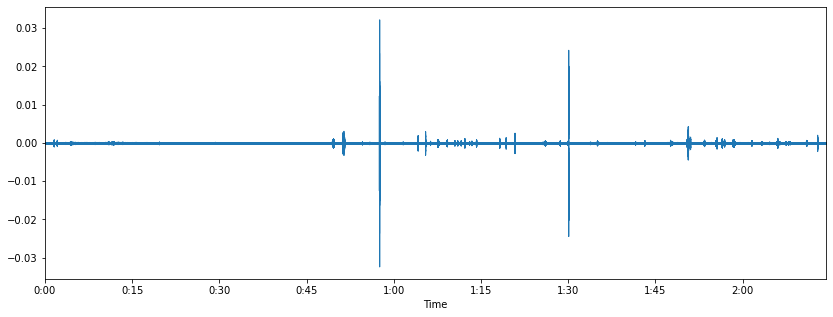

In [29]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
plt.show()

In [39]:
from scipy.signal import butter,filtfilt
def butter_highpass(data,cutoff, fs, order=5):
   """
   Design a highpass filter.
   Args:
   - cutoff (float) : the cutoff frequency of the filter.
   - fs     (float) : the sampling rate.
   - order    (int) : order of the filter, by default defined to 5.
   """
   # calculate the Nyquist frequency
   nyq = 0.5 * fs
   # design filter
   high = cutoff / nyq
   b, a = butter(order, high, btype='high', analog=False)
   # returns the filter coefficients: numerator and denominator
   y = filtfilt(b, a, data)
   return y
#x_f=butter_highpass(x,1000, sr, order=5)
x_f = butter_highpass(x,500,sr,order=5)

In [40]:
o_env = librosa.onset.onset_strength(x_f, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.util.peak_pick(o_env, 3, 3, 3, 5, 0.3, 100)

In [41]:
onset_frames

array([  66,  240,  478,  631,  749,  866,  970, 1134, 1245, 1388, 1518,
       1667, 1789, 1893, 2026, 2129, 2235, 2336, 2455, 2641, 2762, 2884,
       2989, 3108, 3216, 3329, 3447, 3568, 3687, 3815, 3950, 4052, 4161,
       4268, 4373, 4498, 4613, 4754, 4864, 4966, 5069, 5227, 5360, 5487,
       5615, 5721])

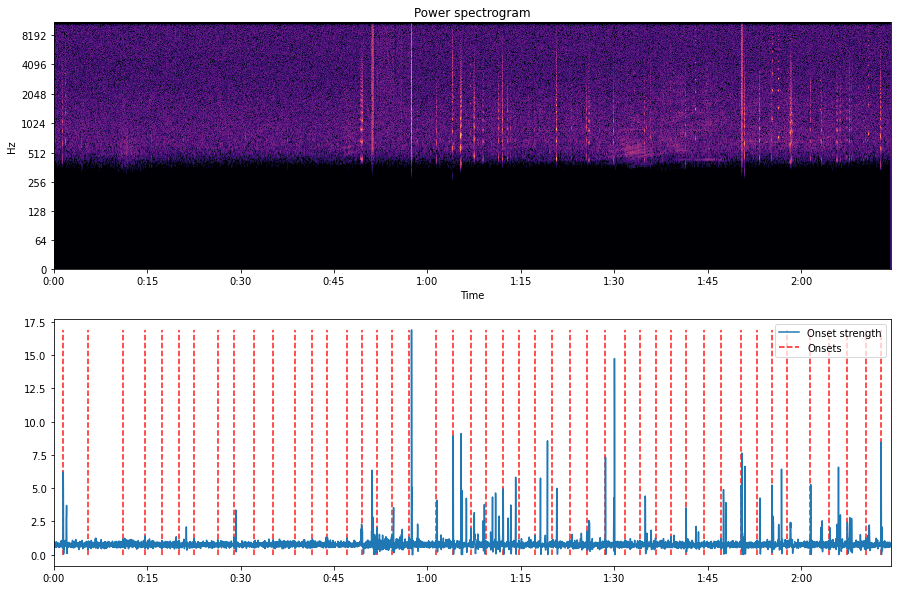

In [42]:
D = np.abs(librosa.stft(x_f))
plt.figure(figsize=(15,10))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log')
plt.title('Power spectrogram')

plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)
plt.show()

In [44]:
times.size

5787